In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
bom = pd.read_csv('../Expanded CSVs/bom.movie_gross.csv')
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
imdb_basics = pd.read_csv('../Expanded CSVs/imdb.title.basics.csv')
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
imdb_ratings = pd.read_csv('../Expanded CSVs/imdb.title.ratings.csv')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
imdb_title_ratings = pd.merge(imdb_basics,imdb_ratings,on="tconst")
imdb_title_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
tn = pd.read_csv('../Expanded CSVs/tn.movie_budgets.csv')
imdb_tn = pd.merge(imdb_title_ratings, tn, left_on='primary_title', right_on='movie')
imdb_tn.head(6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
5,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


In [7]:
imdb_tn.sort_values(by='numvotes', axis=0, ascending=False, inplace=True)
imdb_tn.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
561,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
524,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099"
101,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,32,"Nov 5, 2014",Interstellar,"$165,000,000","$188,017,894","$666,379,375"
1421,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,69,"Dec 25, 2012",Django Unchained,"$100,000,000","$162,805,434","$449,948,323"
116,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,35,"Aug 14, 1998",The Avengers,"$60,000,000","$23,385,416","$48,585,416"


In [8]:
imdb_tn.drop_duplicates(subset='primary_title', keep='first', inplace=True)

In [9]:
imdb_tn.duplicated(subset='primary_title').sum()

0

In [10]:
imdb_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 561 to 2790
Data columns (total 14 columns):
tconst               2126 non-null object
primary_title        2126 non-null object
original_title       2126 non-null object
start_year           2126 non-null int64
runtime_minutes      2089 non-null float64
genres               2126 non-null object
averagerating        2126 non-null float64
numvotes             2126 non-null int64
id                   2126 non-null int64
release_date         2126 non-null object
movie                2126 non-null object
production_budget    2126 non-null object
domestic_gross       2126 non-null object
worldwide_gross      2126 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 249.1+ KB


In [11]:
imdb_tn.describe()

,start_year,runtime_minutes,averagerating,numvotes,id
count,2126.000000,2089.000000,2126.000000,2.126000e+03,2126.000000
mean,2013.816557,105.135472,6.254186,8.591499e+04,50.619003
std,2.504815,18.529756,1.110366,1.472696e+05,28.684814
min,2010.000000,5.000000,1.600000,5.000000e+00,1.000000
25%,2012.000000,92.000000,5.625000,1.772000e+03,26.000000
50%,2014.000000,103.000000,6.400000,3.061550e+04,50.500000
75%,2016.000000,115.000000,7.000000,1.024658e+05,76.000000
max,2019.000000,217.000000,9.100000,1.841066e+06,100.000000


(array([1.352e+03, 3.280e+02, 1.530e+02, 9.400e+01, 4.300e+01, 4.200e+01,
        3.000e+01, 1.900e+01, 2.200e+01, 1.200e+01, 1.300e+01, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.0000000e+00, 6.1373700e+04, 1.2274240e+05, 1.8411110e+05,
        2.4547980e+05, 3.0684850e+05, 3.6821720e+05, 4.2958590e+05,
        4.9095460e+05, 5.5232330e+05, 6.1369200e+05, 6.7506070e+05,
        7.3642940e+05, 7.9779810e+05, 8.5916680e+05, 9.2053550e+05,
        9.8190420e+05, 1.0432729e+06, 1.1046416e+06, 1.1660103e+06,
        1.2273790e+06, 1.2887477e+06, 1.3501164e+06, 1.4114851e+06,
        1.4728538e+06, 1.5342225e+06, 1.5955912e+06, 1.6569599e+06,
        1.7183286e+06, 1.7796973e+06, 1.8410660e+06]),
 <a list of 30 Patch objects>)

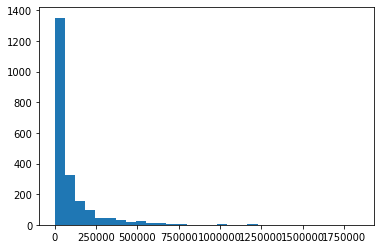

In [12]:
plt.hist(imdb_tn.numvotes, bins=30)

In [13]:
imdb_bom = pd.merge(imdb_title_ratings, bom, left_on='primary_title', right_on='title')
imdb_bom.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [14]:
imdb_bom.sort_values(by='numvotes', axis=0, ascending=False, inplace=True)
imdb_bom.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
514,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,WB,292600000.0,535700000,2010
483,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises,WB,448100000.0,636800000,2012
101,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000,2014
1355,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Django Unchained,Wein.,162800000.0,262600000,2012
163,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,275100000,2013


In [15]:
imdb_bom.drop_duplicates(subset='primary_title', keep='first', inplace=True)

In [16]:
imdb_bom.duplicated(subset='primary_title').sum()

0

In [17]:
imdb_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 514 to 2069
Data columns (total 13 columns):
tconst             2598 non-null object
primary_title      2598 non-null object
original_title     2598 non-null object
start_year         2598 non-null int64
runtime_minutes    2598 non-null float64
genres             2598 non-null object
averagerating      2598 non-null float64
numvotes           2598 non-null int64
title              2598 non-null object
studio             2595 non-null object
domestic_gross     2581 non-null float64
foreign_gross      1558 non-null object
year               2598 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 284.2+ KB


In [49]:
#imdb_tn.drop(['tconst', 'original_title', 'start_year', 'runtime_minutes',
              'id', 'movie', 'numvotes'], axis=1)

In [50]:
#imdb_bom.drop(['tconst', 'original_title', 'start_year', 'runtime_minutes', 'numvotes', 
               'title', 'studio'], axis=1)

In [20]:
imdb_tn_bom = pd.merge(imdb_tn, imdb_bom, left_on='primary_title', right_on='primary_title')
imdb_tn_bom.head(20)

,tconst_x,primary_title,original_title_x,start_year_x,runtime_minutes_x,genres_x,averagerating_x,numvotes_x,id,release_date,...,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,title,studio,domestic_gross_y,foreign_gross,year
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",...,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Inception,WB,292600000.0,535700000,2010
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,11,"Jul 20, 2012",...,2012,164.0,"Action,Thriller",8.4,1387769,The Dark Knight Rises,WB,448100000.0,636800000,2012
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,32,"Nov 5, 2014",...,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Interstellar,Par.,188000000.0,489400000,2014
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,69,"Dec 25, 2012",...,2012,165.0,"Drama,Western",8.4,1211405,Django Unchained,Wein.,162800000.0,262600000,2012
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358,76,"Dec 25, 2013",...,2013,180.0,"Biography,Crime,Drama",8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,275100000,2013
5,tt1130884,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller",8.1,1005960,52,"Feb 19, 2010",...,2010,138.0,"Mystery,Thriller",8.1,1005960,Shutter Island,Par.,128000000.0,166800000,2010
6,tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy",8.1,948394,14,"Aug 1, 2014",...,2014,121.0,"Action,Adventure,Comedy",8.1,948394,Guardians of the Galaxy,BV,333200000.0,440200000,2014
7,tt1431045,Deadpool,Deadpool,2016,108.0,"Action,Adventure,Comedy",8.0,820847,56,"Feb 12, 2016",...,2016,108.0,"Action,Adventure,Comedy",8.0,820847,Deadpool,Fox,363100000.0,420000000,2016
8,tt1392170,The Hunger Games,The Hunger Games,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,38,"Mar 23, 2012",...,2012,142.0,"Action,Adventure,Sci-Fi",7.2,795227,The Hunger Games,LGF,408000000.0,286400000,2012
9,tt1392190,Mad Max: Fury Road,Mad Max: Fury Road,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910,75,"May 15, 2015",...,2015,120.0,"Action,Adventure,Sci-Fi",8.1,780910,Mad Max: Fury Road,WB,153600000.0,224800000,2015


In [21]:
imdb_tn_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1156
Data columns (total 26 columns):
tconst_x             1157 non-null object
primary_title        1157 non-null object
original_title_x     1157 non-null object
start_year_x         1157 non-null int64
runtime_minutes_x    1157 non-null float64
genres_x             1157 non-null object
averagerating_x      1157 non-null float64
numvotes_x           1157 non-null int64
id                   1157 non-null int64
release_date         1157 non-null object
movie                1157 non-null object
production_budget    1157 non-null object
domestic_gross_x     1157 non-null object
worldwide_gross      1157 non-null object
tconst_y             1157 non-null object
original_title_y     1157 non-null object
start_year_y         1157 non-null int64
runtime_minutes_y    1157 non-null float64
genres_y             1157 non-null object
averagerating_y      1157 non-null float64
numvotes_y           1157 non-null int64
title       